In [1]:
from brian2 import *
%matplotlib inline


In [2]:
def input_generate():
    pass

In [3]:
# Membrane potential is reset to vr
vr = -60*mV
vt = 30*mV
d = 2*volt/second

# Izhikevich Neuron Model
a = 0.02/ms; b = 0.2/ms
izhi_eqs = '''dvm/dt = (0.04/ms/mV)*vm**2+(5/ms)*vm+140*mV/ms-w+I : volt
         dw/dt = a*(b*vm-w) : volt/second
         I :volt/second'''
izhi_reset_eqs = ''' vm = vr
w += d
'''

clang: warning: libstdc++ is deprecated; move to libc++ with a minimum deployment target of OS X 10.9 [-Wdeprecated]
ld: library not found for -lstdc++
clang: error: linker command failed with exit code 1 (use -v to see invocation)
WARNING    Cannot use Cython, a test compilation failed: command 'g++' failed with exit status 1 (LinkError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


[[-60.      -61.6     -63.21936 ... -70.      -70.      -70.     ]
 [-60.      -61.6     -63.21936 ... -70.      -70.      -70.     ]] mV


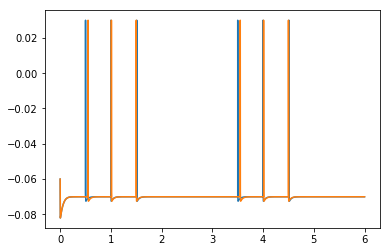

In [4]:
start_scope()
# Visual Input
visual_input_indices = array([0,1,0,1,1,0,
                       0,1,0,1,1,0])
visual_input_times = array([ 500,  550, 1000, 1010, 1500, 1510,
                     3500, 3550, 4000, 4010, 4500, 4510])*ms
visual_input = SpikeGeneratorGroup(2,visual_input_indices,visual_input_times)

# Visual neurons
visual_neurons = NeuronGroup(2,izhi_eqs,threshold='vm>vt',reset=izhi_reset_eqs,method='euler')
visual_neurons.vm = vr

visual_spike_monitor = SpikeMonitor(visual_neurons)
visual_state_monitor = StateMonitor(visual_neurons, 'vm', record=[0,1])

# Synapse between Input and Visual Neurons
visual_input_synapse = Synapses(visual_input,visual_neurons,model='''s:volt''',on_pre='vm += s')
    # Connect neuron 0->0, 1->1
visual_input_synapse.connect(i = [0,1],j = [0,1])
visual_input_synapse.s = 100. *mV

visual_input_synapse_monitor = StateMonitor(visual_input_synapse,['s'],record = [0])
# Run the visual input
run(6*second)
print(visual_state_monitor.vm)
plot(visual_state_monitor.t,visual_state_monitor.vm[0])
plot(visual_state_monitor.t,visual_state_monitor.vm[1])

[[-60.      -61.6     -63.21936 ... -70.      -70.      -70.     ]
 [-60.      -61.6     -63.21936 ... -70.      -70.      -70.     ]] mV
[[100. 100. 100. ... 100. 100. 100.]] mV


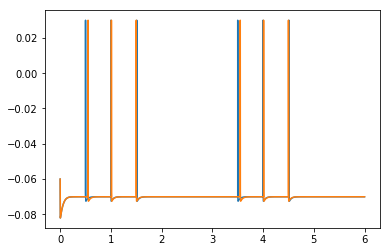

In [6]:
start_scope()
# Proprioceptive input
proprio_input_indices = array([0,1,0,1,1,0,
                       0,1,0,1,1,0])
proprio_input_times = array([ 500,  550, 1000, 1010, 1500, 1510,
                     3500, 3550, 4000, 4010, 4500, 4510])*ms
proprio_input = SpikeGeneratorGroup(2,proprio_input_indices,proprio_input_times)

# Proprioceptive neurons
proprio_neurons = NeuronGroup(2,izhi_eqs,threshold='vm>vt',reset=izhi_reset_eqs,method='euler')
proprio_neurons.vm = vr

proprio_spike_monitor = SpikeMonitor(proprio_neurons)
proprio_state_monitor = StateMonitor(proprio_neurons, 'vm', record=[0,1])

# Synapse between Input and Proprioceptive Neurons
proprio_input_synapse = Synapses(proprio_input,proprio_neurons,model='''s:volt''',on_pre='vm += s')
    # Connect neuron 0->0, 1->1
proprio_input_synapse.connect(i = [0,1],j = [0,1])
proprio_input_synapse.s = 100. *mV

proprio_input_synapse_monitor = StateMonitor(proprio_input_synapse,['s'],record = [0])
# Run the proprioceptive input
run(6*second)
print(proprio_state_monitor.vm)
plot(proprio_state_monitor.t,proprio_state_monitor.vm[0])
plot(proprio_state_monitor.t,proprio_state_monitor.vm[1])

print(proprio_input_synapse_monitor.s)
#plot(proprio_input_synapse_monitor.t,proprio_input_synapse_monitor.s[0])